DATA PREPARATION

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

pd.set_option('display.max_rows',500)

In [3]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

In [4]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180864,180864,180864,180864,181120,181178,181236,181465,181534,181574
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276583,276638,276690,276731,276731,276821,276821,276821,277141,277141
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265920,265925,265925,265927,265937,265943,265952,265964,265968,265971
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43224,43224,43224,43224,43224,43224,43449,43449,43449,43449
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [5]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/9/22', '6/10/22', '6/11/22', '6/12/22', '6/13/22', '6/14/22',
       '6/15/22', '6/16/22', '6/17/22', '6/18/22'],
      dtype='object', length=879)

In [6]:
time_idx=pd_raw.columns[4:]

In [7]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20
...,...
874,6/14/22
875,6/15/22
876,6/16/22
877,6/17/22


In [8]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
6/14/22    27007429
6/15/22    27096571
6/16/22    27124689
6/17/22    27204953
6/18/22    27204955
Length: 879, dtype: int64

In [9]:
country_list=['Germany','US','India','Canada','Spain']
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [10]:
df_plot.head()

,date,Germany,US,India,Canada,Spain
0,1/22/20,0,1,0,0,0
1,1/23/20,0,1,0,2,0
2,1/24/20,0,2,0,3,0
3,1/25/20,0,2,0,3,0
4,1/26/20,0,5,0,3,0


<AxesSubplot:xlabel='date'>

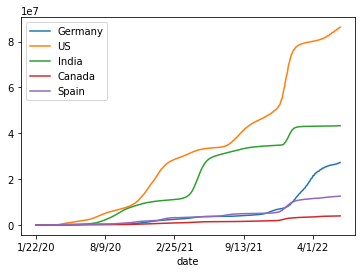

In [11]:
%matplotlib inline
df_plot.set_index('date').plot()

In [12]:
datetime.strptime(df_plot.date[0],"%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [13]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [14]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
df_plot.head()

,date,Germany,US,India,Canada,Spain
0,2020-01-22,0,1,0,0,0
1,2020-01-23,0,1,0,2,0
2,2020-01-24,0,2,0,3,0
3,2020-01-25,0,2,0,3,0
4,2020-01-26,0,5,0,3,0


In [16]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

Relational data model

In [17]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180864,180864,180864,180864,181120,181178,181236,181465,181534,181574
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276583,276638,276690,276731,276731,276821,276821,276821,277141,277141
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265920,265925,265925,265927,265937,265943,265952,265964,265968,265971
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43224,43224,43224,43224,43224,43224,43449,43449,43449,43449
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [18]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing

In [19]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22,6/18/22
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,180864,180864,180864,180864,181120,181178,181236,181465,181534,181574
1,no,Albania,0,0,0,0,0,0,0,0,...,276583,276638,276690,276731,276731,276821,276821,276821,277141,277141
2,no,Algeria,0,0,0,0,0,0,0,0,...,265920,265925,265925,265927,265937,265943,265952,265964,265968,265971
3,no,Andorra,0,0,0,0,0,0,0,0,...,43224,43224,43224,43224,43224,43224,43449,43449,43449,43449
4,no,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [20]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [21]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [22]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [23]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

             date state country  confirmed
249360 2022-06-14    no      US   85758512
249645 2022-06-15    no      US   85941290
249930 2022-06-16    no      US   86057735
250215 2022-06-17    no      US   86216418
250500 2022-06-18    no      US   86230982
